# ASTR19 Group Project_Cathy

### Load the data

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data = pd.read_table('ASTR19_F24_group_project_data.txt', skiprows=3, header=None, sep='\s+', names=["Day", "Time", "Height"])

In [66]:
data

,Day,Time,Height
0,1,8:07,6.57
1,1,15:37,-0.39
2,2,8:55,5.38
3,2,16:25,-1.74
4,3,9:45,5.26
...,...,...,...
77,39,11:15,3.26
78,40,4:29,5.21
79,40,12:22,2.39
80,41,5:21,4.83


### Define the oscillatory function

In [67]:
def oscillatory_function(t, A, omega, phi, B):
    return A * np.sin(omega * t + phi) + B

### Convert time to hours

In [68]:
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M')
data['Time_in_hours'] = data['Time'].dt.hour + data['Time'].dt.minute / 60.0

# Assuming the first day starts at 0 hours
data['Elapsed_hours'] = (data['Day'] - 1) * 24 + data['Time_in_hours']

### Fit the model

In [69]:
# ssume that the standard deviation is 0.25 ft for each data point
initial_guess = [2, 2*np.pi/24, 0, 3]

params, params_covariance = curve_fit(oscillatory_function, data['Elapsed_hours'], data['Height'], p0=initial_guess, sigma=0.25)
A, omega, phi, B = params

### Plot the data and model

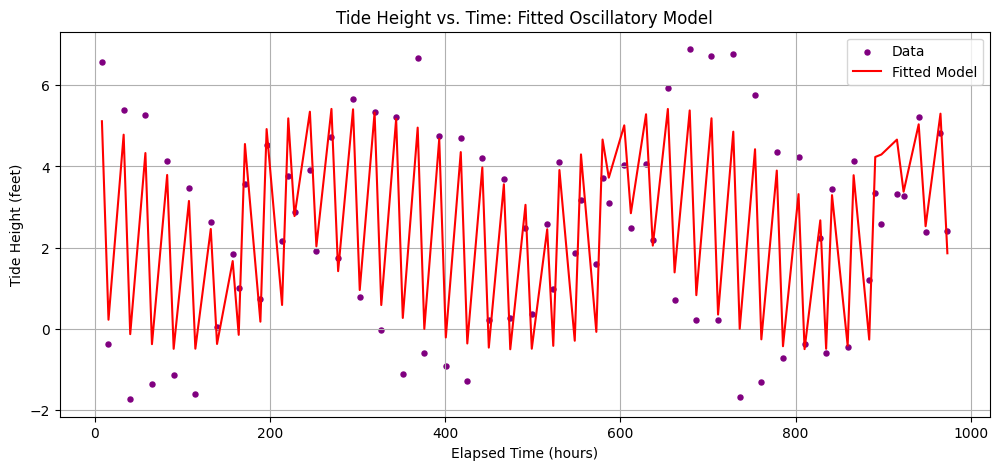

In [70]:
plt.figure(figsize=(12, 5))
plt.scatter(data['Elapsed_hours'], data['Height'], label="Data", color='purple', s=13)
plt.plot(data['Elapsed_hours'], oscillatory_function(data['Elapsed_hours'], *params), label="Fitted Model", color='red')
plt.xlabel("Elapsed Time (hours)")
plt.ylabel("Tide Height (feet)")
plt.title("Tide Height vs. Time: Fitted Oscillatory Model")
plt.legend()
plt.grid(True)
plt.savefig("tide_model.pdf")
plt.show()

### Plot Residuals and Analyze Deviations

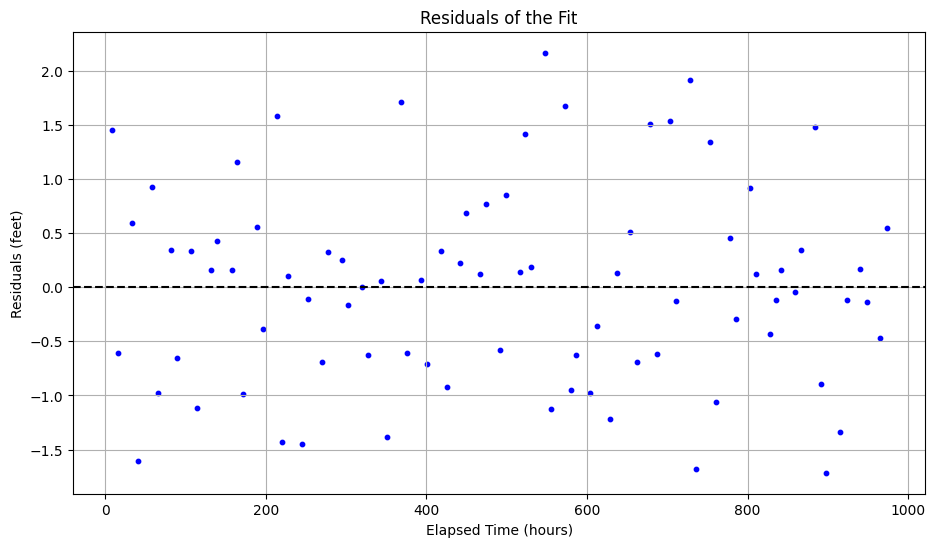

In [71]:
residuals = data['Height'] - oscillatory_function(data['Elapsed_hours'], *params)

# Plot the residuals
plt.figure(figsize=(11, 6))
plt.scatter(data['Elapsed_hours'], residuals, color='blue', s=10)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Elapsed Time (hours)")
plt.ylabel("Residuals (feet)")
plt.title("Residuals of the Fit")
plt.grid(True)
plt.savefig("residuals_plot.pdf")
plt.show()

Standard Deviation of Residuals: 0.914


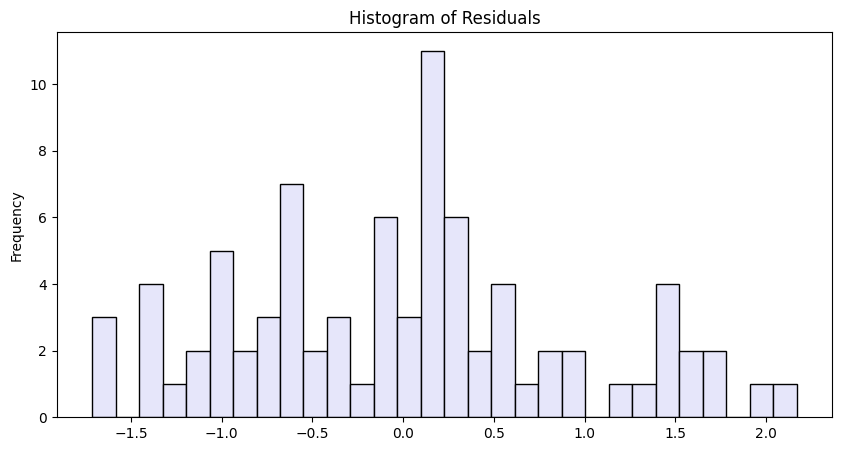

In [72]:
plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=30, edgecolor='black', color='lavender')
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")

# Calculate standard deviation of the residuals
std_residuals = np.std(residuals)
print(f"Standard Deviation of Residuals: {std_residuals:.3f}")

plt.savefig("residuals_histogram.pdf")
plt.show()

In [73]:
variance_residuals = np.var(residuals)
intrinsic_scatter = np.sqrt(variance_residuals - 0.25**2)
print(f"Intrinsic Scatter: {intrinsic_scatter:.3f} feet")

Intrinsic Scatter: 0.879 feet


### Assess the Tsunami Deviation

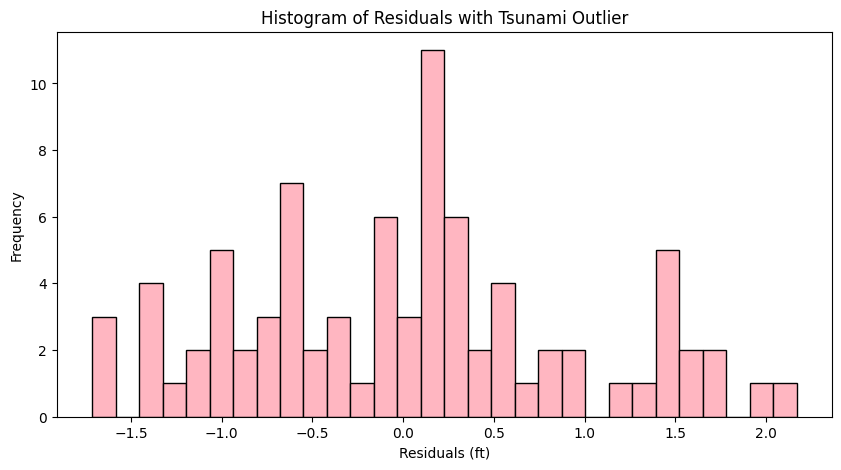

Tsunami deviation in terms of standard deviations: 1.55 std


In [77]:
outlier_value = 2.0
outlier_time = data['Elapsed_hours'][27]

outlier_residual = outlier_value - oscillatory_function(outlier_time, *params)

# Add the outlier to the residuals and replot the histogram
residuals_with_outlier = np.append(residuals, outlier_residual)

plt.figure(figsize=(10,5))
plt.hist(residuals_with_outlier, bins=30, edgecolor='black', color='lightpink')
plt.xlabel('Residuals (ft)')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals with Tsunami Outlier')

plt.savefig('residuals_with_outlier_histogram.pdf')
plt.show()

# Calculate the standard deviations of the outlier
std_outlier = outlier_residual / std_residuals
print(f"Tsunami deviation in terms of standard deviations: {std_outlier:.2f} std")
